In [1]:
import pandas as pd
pd.set_option('display.max_colwidth', 200)

# Pre-processing

## Applying the Manual Matches to Dataframe

In [2]:
coles_match_wow = pd.read_csv('3. Fuzzy Matching/Token Sort/Coles_Woolworths_revised.csv', encoding='latin')

In [3]:
coles_match_wow.head()

,SKU,Brand,Product Name,Brand_Product_Size,WOW Product Match,Match Score,Manual Match,COL Price,COL ppu,COL Size,COL Specials,COL Category,Product URL
0,6800779P,100 Plus,Isotonic Drink Can,100 Plus Isotonic Drink Can 325mL,100 Plus Sport Isotonic Can 325mL,81.0,NaN,1.3,$4.00 per 1L,325mL,NaN,Drinks,https://shop.coles.com.au/a/national/product/100-plus--drink-isotonic
1,2015360P,1000 Hour,Black Eyelash & Brow Dye Kit,1000 Hour Black Eyelash & Brow Dye Kit each,1000hour Eyelashes & Brow Dye Kit Black each,86.0,Y,20.0,$20.00 per 1Ea,each,NaN,Health & Beauty,https://shop.coles.com.au/a/national/product/1000hr-eyebrow-dye-kit-black
2,2015370P,1000 Hour,Dark Brown Eyelash & Brow Dye Kit,1000 Hour Dark Brown Eyelash & Brow Dye Kit each,1000hour Eyelashes & Brow Dye Kit Dark Brown each,88.0,Y,20.0,$20.00 per 1Ea,each,NaN,Health & Beauty,https://shop.coles.com.au/a/national/product/1000hr-eyebrow-dye-kit-dark-brown
3,3985645P,180 Degrees,Maple Cranberry Apricot Oat Crackers,180 Degrees Maple Cranberry Apricot Oat Crackers 135g,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",100.0,NaN,5.5,$4.07 per 100G,135g,NaN,Pantry,https://shop.coles.com.au/a/national/product/maple-cran-oat-crackers
4,3635279P,180 Degrees,Almond Oat Crackers,180 Degrees Almond Oat Crackers 150g,180 Degrees Oat Crackers Walnut 150g,80.0,NaN,5.5,$3.67 per 100G,150g,NaN,Pantry,https://shop.coles.com.au/a/national/product/180-degrees-almond-oat-crackers


## Functions to unify "Brand_Product_Size"

In [4]:
# Function - if the fuzzy match score is 100, change 'Brand_Product_Size' value to the WOW Product Match value.

def unify_names(x):
    if x['Match Score'] == 100:
        return x['WOW Product Match']
    else:
        return x['Brand_Product_Size']

In [5]:
coles_match_wow['Brand_Product_Size'] = coles_match_wow.apply(unify_names, axis=1)

In [6]:
coles_match_wow.head()

,SKU,Brand,Product Name,Brand_Product_Size,WOW Product Match,Match Score,Manual Match,COL Price,COL ppu,COL Size,COL Specials,COL Category,Product URL
0,6800779P,100 Plus,Isotonic Drink Can,100 Plus Isotonic Drink Can 325mL,100 Plus Sport Isotonic Can 325mL,81.0,NaN,1.3,$4.00 per 1L,325mL,NaN,Drinks,https://shop.coles.com.au/a/national/product/100-plus--drink-isotonic
1,2015360P,1000 Hour,Black Eyelash & Brow Dye Kit,1000 Hour Black Eyelash & Brow Dye Kit each,1000hour Eyelashes & Brow Dye Kit Black each,86.0,Y,20.0,$20.00 per 1Ea,each,NaN,Health & Beauty,https://shop.coles.com.au/a/national/product/1000hr-eyebrow-dye-kit-black
2,2015370P,1000 Hour,Dark Brown Eyelash & Brow Dye Kit,1000 Hour Dark Brown Eyelash & Brow Dye Kit each,1000hour Eyelashes & Brow Dye Kit Dark Brown each,88.0,Y,20.0,$20.00 per 1Ea,each,NaN,Health & Beauty,https://shop.coles.com.au/a/national/product/1000hr-eyebrow-dye-kit-dark-brown
3,3985645P,180 Degrees,Maple Cranberry Apricot Oat Crackers,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g","180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",100.0,NaN,5.5,$4.07 per 100G,135g,NaN,Pantry,https://shop.coles.com.au/a/national/product/maple-cran-oat-crackers
4,3635279P,180 Degrees,Almond Oat Crackers,180 Degrees Almond Oat Crackers 150g,180 Degrees Oat Crackers Walnut 150g,80.0,NaN,5.5,$3.67 per 100G,150g,NaN,Pantry,https://shop.coles.com.au/a/national/product/180-degrees-almond-oat-crackers


In [7]:
# Function - if the 'Manual Match' value is 'Y', change 'Brand_Product_Size' value to the WOW Product Match value.

def manual_match(x):
    if x['Manual Match'] == 'Y':
        return x['WOW Product Match']
    else:
        return x['Brand_Product_Size']

In [8]:
coles_match_wow['Brand_Product_Size'] = coles_match_wow.apply(manual_match, axis=1)

In [9]:
coles_match_wow.loc[coles_match_wow['Manual Match'] == 'Y'].head()

,SKU,Brand,Product Name,Brand_Product_Size,WOW Product Match,Match Score,Manual Match,COL Price,COL ppu,COL Size,COL Specials,COL Category,Product URL
1,2015360P,1000 Hour,Black Eyelash & Brow Dye Kit,1000hour Eyelashes & Brow Dye Kit Black each,1000hour Eyelashes & Brow Dye Kit Black each,86.0,Y,20.0,$20.00 per 1Ea,each,NaN,Health & Beauty,https://shop.coles.com.au/a/national/product/1000hr-eyebrow-dye-kit-black
2,2015370P,1000 Hour,Dark Brown Eyelash & Brow Dye Kit,1000hour Eyelashes & Brow Dye Kit Dark Brown each,1000hour Eyelashes & Brow Dye Kit Dark Brown each,88.0,Y,20.0,$20.00 per 1Ea,each,NaN,Health & Beauty,https://shop.coles.com.au/a/national/product/1000hr-eyebrow-dye-kit-dark-brown
12,7630890P,Command,Hooks Medium Value Pack,3m Command Medium Hooks Value Pack 6 pack,3m Command Medium Hooks Value Pack 6 pack,96.0,Y,13.5,$13.50 per 1ea,6 pack,NaN,Household,https://shop.coles.com.au/a/national/product/command-hooks-medium-value-pack
21,9760091P,A2,Dairy Full Cream Milk,A2 Full Cream Milk 2L,A2 Full Cream Milk 2L,87.0,Y,5.3,$2.65 per 1L,2L,NaN,Dairy Eggs & Fridge,https://shop.coles.com.au/a/national/product/a2-milk-full-cream-9760091p
27,2412654P,A2,Full Cream Instant Milk Powder,A2 Full Cream Milk Powder 1kg,A2 Full Cream Milk Powder 1kg,87.0,Y,15.0,$1.50 per 100G,1kg,NaN,Dairy Eggs & Fridge,https://shop.coles.com.au/a/national/product/a2-full-cream-milk-powder


## Inner merge the above Coles Dataframe with Woolworths

In [10]:
wow = pd.read_csv('2. Modified Data/Modified Woolworths (modded).csv')

''' 
One product was manually renamed because it had the exact same brand + product name + package size as another. Another 10/10 galaxy brain 900IQ Woolworths move.
https://www.woolworths.com.au/shop/productdetails/820279/garnier-micellar-cleansing-water-in-oil
https://www.woolworths.com.au/shop/productdetails/503287/garnier-micellar-cleansing-water-in-oil
'''


' \nOne product was manually renamed because it had the exact same brand + product name + package size as another. Another 10/10 galaxy brain 900IQ Woolworths move.\nhttps://www.woolworths.com.au/shop/productdetails/820279/garnier-micellar-cleansing-water-in-oil\nhttps://www.woolworths.com.au/shop/productdetails/503287/garnier-micellar-cleansing-water-in-oil\n'

In [11]:
wow.head()

,SKU,Brand_Product_Size,Brand,Product Name,WOW Price,WOW Size,WOW ppu,WOW Specials,WOW Category,Online Only,New Product,Product URL
0,814139,Em Wholefoods Hemp Oil Cold Pressed 250mL,em wholefoods,Em Wholefoods Hemp Oil Cold Pressed,19.95,250mL,$7.98 / 100ML,NaN,Pantry,NaN,NaN,https://www.woolworths.com.au/shop/productdetails/814139/em-wholefoods-hemp-oil-cold-pressed
1,84972,Happy Little Camper Newborn Natural Nappies 36 pack,happy little camper,Happy Little Camper Newborn Natural Nappies,14.00,36 pack,$0.39 / 1EA,NaN,Baby,NaN,NaN,https://www.woolworths.com.au/shop/productdetails/84972/happy-little-camper-newborn-natural-nappies
2,95412,Spc Spaghetti Rich Tomato 140g x12 pack,spc,Spc Spaghetti Rich Tomato,10.50,140g x12 pack,$0.63 / 100G,NaN,Pantry,NaN,NaN,https://www.woolworths.com.au/shop/productdetails/95412/spc-spaghetti-rich-tomato
3,99040,Mint Glazed Antipasto Dish Blue each,mint,Mint Glazed Antipasto Dish Blue,2.00,each,NaN,NaN,NOT LISTED,NaN,NaN,https://www.woolworths.com.au/shop/productdetails/99040/mint-glazed-antipasto-dish-blue
4,808305,Seedlip Grove 42 Alcohol Free 700mL,seedlip,Seedlip Grove 42 Alcohol Free,50.00,700mL,$71.43 / 1L,NaN,Drinks,NaN,NaN,https://www.woolworths.com.au/shop/productdetails/808305/seedlip-grove-42-alcohol-free


In [12]:
# Selecting only necessary columns

col = coles_match_wow[['Brand_Product_Size', 'Brand', 'COL Price', 'COL ppu', 'COL Specials']]
wow = wow[['Brand_Product_Size', 'Brand', 'WOW Price', 'WOW ppu', 'WOW Specials']]

In [13]:
col.head()

,Brand_Product_Size,Brand,COL Price,COL ppu,COL Specials
0,100 Plus Isotonic Drink Can 325mL,100 Plus,1.3,$4.00 per 1L,NaN
1,1000hour Eyelashes & Brow Dye Kit Black each,1000 Hour,20.0,$20.00 per 1Ea,NaN
2,1000hour Eyelashes & Brow Dye Kit Dark Brown each,1000 Hour,20.0,$20.00 per 1Ea,NaN
3,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",180 Degrees,5.5,$4.07 per 100G,NaN
4,180 Degrees Almond Oat Crackers 150g,180 Degrees,5.5,$3.67 per 100G,NaN


In [14]:
# Inner merge both df with the key=Brand_Product_Size, and NaN values replaced with blank

coles_v_wow = pd.merge(col, wow, on='Brand_Product_Size', how='inner').fillna('')

In [15]:
coles_v_wow.drop_duplicates(inplace=True)

In [16]:
coles_v_wow.head()

,Brand_Product_Size,Brand_x,COL Price,COL ppu,COL Specials,Brand_y,WOW Price,WOW ppu,WOW Specials
0,1000hour Eyelashes & Brow Dye Kit Black each,1000 Hour,20.0,$20.00 per 1Ea,,1000hour,14.0,$14.00 / 1EA,Specials
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,1000 Hour,20.0,$20.00 per 1Ea,,1000hour,14.0,$14.00 / 1EA,Specials
2,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",180 Degrees,5.5,$4.07 per 100G,,180 degrees,5.0,$3.70 / 100G,Specials
3,180 Degrees Oat Crackers Walnut 150g,180 Degrees,5.5,$3.67 per 100G,,180 degrees,5.0,$3.33 / 100G,Specials
4,180 Degrees Parmesan Oat Crackers 135g,180 Degrees,5.5,$4.07 per 100G,,180 degrees,5.0,$3.70 / 100G,Specials


In [17]:
len(coles_v_wow)

4764

## Preliminary error check

#### To see if any obvious manual matching errors occurred i.e. having totally different Brands or having private labels

In [18]:
brand_mismatched = coles_v_wow.loc[coles_v_wow['Brand_x'].apply(lambda x: x.lower()) != coles_v_wow['Brand_y']]
brand_mismatched.head()

,Brand_Product_Size,Brand_x,COL Price,COL ppu,COL Specials,Brand_y,WOW Price,WOW ppu,WOW Specials
0,1000hour Eyelashes & Brow Dye Kit Black each,1000 Hour,20.0,$20.00 per 1Ea,,1000hour,14.0,$14.00 / 1EA,Specials
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,1000 Hour,20.0,$20.00 per 1Ea,,1000hour,14.0,$14.00 / 1EA,Specials
5,3m Command Medium Hooks Value Pack 6 pack,Command,13.5,$13.50 per 1ea,,3m command,13.5,$2.25 / 1EA,
29,Abe's Bagel Bakery Natural Bagels 360g 4 pack,Abe's Bagels,5.0,$1.39 per 100G,,abe's bagel bakery,5.0,$1.25 / 1EA,
31,Abe's Bagel Bakery Sesame Seed Bagels 360g 4 pack,Abe's Bagels,5.0,$1.39 per 100G,,abe's bagel bakery,5.0,$1.25 / 1EA,


In [19]:
brand_mismatched = brand_mismatched[['Brand_Product_Size', 'Brand_x', 'Brand_y', 'COL Price', 'WOW Price', 'COL ppu', 'WOW ppu']]
brand_mismatched.head()

,Brand_Product_Size,Brand_x,Brand_y,COL Price,WOW Price,COL ppu,WOW ppu
0,1000hour Eyelashes & Brow Dye Kit Black each,1000 Hour,1000hour,20.0,14.0,$20.00 per 1Ea,$14.00 / 1EA
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,1000 Hour,1000hour,20.0,14.0,$20.00 per 1Ea,$14.00 / 1EA
5,3m Command Medium Hooks Value Pack 6 pack,Command,3m command,13.5,13.5,$13.50 per 1ea,$2.25 / 1EA
29,Abe's Bagel Bakery Natural Bagels 360g 4 pack,Abe's Bagels,abe's bagel bakery,5.0,5.0,$1.39 per 100G,$1.25 / 1EA
31,Abe's Bagel Bakery Sesame Seed Bagels 360g 4 pack,Abe's Bagels,abe's bagel bakery,5.0,5.0,$1.39 per 100G,$1.25 / 1EA


In [20]:
brand_mismatched.to_csv('4. Coles vs. Woolworths/Mismatch Brands.csv', index=False)

Issues found.

See screenshots in folder titled '4. Coles vs. Woolworths'.

Issues resolved.

<br>


</br>

# Price Comparison - Coles vs. Woolworths

In [21]:
# Drop the Brand_x and Brand_y columns

coles_v_wow.drop(['Brand_x', 'Brand_y'], axis=1, inplace=True)

In [22]:
coles_v_wow.to_csv('4. Coles vs. Woolworths/coles_v_wow.csv', index=False, encoding='utf-8-sig')

In [23]:
# Total number of unique identical products in our current list
# Also, used for error checking. If this number matches the len(cole_v_wow) then everything checks out.

total_unique_products = len(coles_v_wow['Brand_Product_Size'].unique())
total_unique_products

4764

In [24]:
# Function to be used to for creating a new column showing which stores has the cheapest prices for that particular product

def cheapest_seller(COL, WOW):
    if COL > WOW:
        return 'WOW'
    elif COL < WOW:
        return 'COL'
    else:
        return 'Same Price'

In [25]:
# Create new column (Cheapest Seller)

coles_v_wow['Cheapest Seller'] = coles_v_wow.apply(lambda x: cheapest_seller(x['COL Price'], x['WOW Price']), axis=1)

In [26]:
# Re-organise the arrangement of columns

coles_v_wow = coles_v_wow[['Brand_Product_Size', 'COL Price', 'WOW Price', 'Cheapest Seller', 'COL Specials', 'WOW Specials']]

In [27]:
coles_v_wow.head(3)

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
0,1000hour Eyelashes & Brow Dye Kit Black each,20.0,14.0,WOW,,Specials
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,20.0,14.0,WOW,,Specials
2,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",5.5,5.0,WOW,,Specials


## Same Price

In [28]:
same_price = coles_v_wow.loc[coles_v_wow['Cheapest Seller'] == 'Same Price']

In [29]:
print(f"\nThere are {len(same_price['Brand_Product_Size'].unique())} products with matching prices")
print(f"\nThis means {round(100*len(same_price['Brand_Product_Size'].unique())/total_unique_products, 2)}% of the products in the sample have identical prices")


There are 2477 products with matching prices

This means 51.99% of the products in the sample have identical prices


### Same Price - Same "Specials" Status

In [30]:
same_price_same_specstat = same_price.loc[same_price['COL Specials'] == same_price['WOW Specials']]
same_price_same_specstat.head()

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
5,3m Command Medium Hooks Value Pack 6 pack,13.50,13.50,Same Price,,
6,A2 Full Cream Milk 1L,3.20,3.20,Same Price,,
7,A2 Full Cream Milk 2L,5.30,5.30,Same Price,,
8,A2 Full Cream Milk 3L,7.95,7.95,Same Price,,
9,A2 Full Cream Milk Powder 1kg,15.00,15.00,Same Price,,


In [31]:
len(same_price_same_specstat)

2012

### Same Price - Different "Specials" Status

In [32]:
same_price_diff_specstat = same_price.loc[same_price['COL Specials'] != same_price['WOW Specials']]

In [33]:
len(same_price_diff_specstat)

465

In [34]:
same_price_diff_specstat.head()

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
58,Air Wick Essential Mist Refill Mandarin & Sweet Orange 20mL,8.0,8.0,Same Price,Specials,
59,Air Wick Essential Mist Refill Peony & Jasmine 20mL,8.0,8.0,Same Price,Specials,
60,Air Wick Essential Oil Freshmatic Refill Frangipani 174g,8.0,8.0,Same Price,Specials,
61,Air Wick Essential Oil Freshmatic Refill Vanilla 174g,8.0,8.0,Same Price,Specials,
69,Air Wick Pure Freshmatic Refill Cherry Blossom 157g,8.0,8.0,Same Price,Specials,


In [35]:
same_price_diff_specstat['COL Specials'].value_counts()

Specials    460
              5
Name: COL Specials, dtype: int64

In [36]:
same_price_diff_specstat['WOW Specials'].value_counts()

            460
Specials      5
Name: WOW Specials, dtype: int64

## Different Price

In [37]:
diff_price = coles_v_wow.loc[coles_v_wow['Cheapest Seller'] != 'Same Price']

In [38]:
len(diff_price['Brand_Product_Size'].unique())

2287

In [39]:
diff_price['Cheapest Seller'].value_counts()

WOW    1307
COL     980
Name: Cheapest Seller, dtype: int64

### Different Price - Same "Specials" Status

In [40]:
diff_price_same_specstat = diff_price.loc[diff_price['COL Specials'] == diff_price['WOW Specials']]
diff_price_same_specstat.head()

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
28,Abc Chilli Sauce Extra Hot 340mL,2.75,2.8,COL,,
42,Aeroplane Jelly Berry Blue 85g,1.15,1.0,WOW,Specials,Specials
43,Aeroplane Jelly Purple Grape 85g,1.15,1.0,WOW,Specials,Specials
72,Air Wick Reed Diffuser Decorative Freesia & Jasmine 50mL,11.00,8.0,WOW,Specials,Specials
73,Ajax Eco Bathroom Cleaner Spray Orange & Ginger 450mL,3.50,2.5,WOW,Specials,Specials


In [41]:
len(diff_price_same_specstat)

649

In [42]:
diff_price_same_specstat['Cheapest Seller'].value_counts()

WOW    423
COL    226
Name: Cheapest Seller, dtype: int64

### Different Price - Different "Specials" Status

In [43]:
diff_price_diff_specstat = diff_price.loc[diff_price['COL Specials'] != diff_price['WOW Specials']]
diff_price_diff_specstat.head()

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
0,1000hour Eyelashes & Brow Dye Kit Black each,20.0,14.0,WOW,,Specials
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,20.0,14.0,WOW,,Specials
2,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",5.5,5.0,WOW,,Specials
3,180 Degrees Oat Crackers Walnut 150g,5.5,5.0,WOW,,Specials
4,180 Degrees Parmesan Oat Crackers 135g,5.5,5.0,WOW,,Specials


In [44]:
len(diff_price_diff_specstat)

1638

In [45]:
diff_price_diff_specstat['Cheapest Seller'].value_counts()

WOW    884
COL    754
Name: Cheapest Seller, dtype: int64

## Specials Comparison

In [46]:
# Number of Products on Specials

print(f"Coles has {len(coles_v_wow.loc[coles_v_wow['COL Specials'] == 'Specials'])} items on special")

print(f"Woolworths has {len(coles_v_wow.loc[coles_v_wow['WOW Specials'] == 'Specials'])} items on special")

Coles has 1798 items on special
Woolworths has 1465 items on special


In [47]:
# Number of products with the same "Specials" status

len(coles_v_wow.loc[coles_v_wow['COL Specials'] == coles_v_wow['WOW Specials']])

2661

In [48]:
# Number of products with different "Specials" status

len(coles_v_wow.loc[coles_v_wow['COL Specials'] != coles_v_wow['WOW Specials']])

2103

### Coles - 'on special' & cheaper than Woolworths

In [49]:
filter = (
    (coles_v_wow['COL Specials'] == 'Specials') &
    (coles_v_wow['Cheapest Seller'] == 'COL')
)

coles_v_wow.loc[filter]

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
19,Abbott's Village Bakery Gluten Free Farmhouse Wholemeal 500g,6.00,7.00,COL,Specials,
20,Abbott's Village Bakery Gluten Free Mixed Seeds 500g,6.00,7.00,COL,Specials,
21,Abbott's Village Bakery Gluten Free Rustic White 500g,6.00,7.00,COL,Specials,
22,Abbott's Village Bakery Gluten Free Soy & Linseed 500g,6.00,7.00,COL,Specials,
26,Abbott's Village Bakery Sourdough Grains & Seeds Loaf 760g,3.80,4.30,COL,Specials,
...,...,...,...,...,...,...
5453,Yates Blitzem Garden Snail & Slug Pellets 500g,3.08,3.85,COL,Specials,
5454,Yates Tomato & Veg Dust 500g,8.32,10.40,COL,Specials,
5458,Yeo's Satay Sauce Satay Bbq 250mL,3.30,4.00,COL,Specials,
5474,Yumi's Sesame Falafel Balls 225g,4.50,5.00,COL,Specials,


In [50]:
print(f"{len(coles_v_wow.loc[filter])} of {len(coles_v_wow.loc[coles_v_wow['COL Specials'] == 'Specials'])} items on special at Coles are cheaper at Coles")

865 of 1798 items on special at Coles are cheaper at Coles


### Woolworths - 'on special' & cheaper than Coles

In [51]:
filter = (
    (coles_v_wow['WOW Specials'] == 'Specials') &
    (coles_v_wow['Cheapest Seller'] == 'WOW')
)

coles_v_wow.loc[filter]

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
0,1000hour Eyelashes & Brow Dye Kit Black each,20.00,14.0,WOW,,Specials
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,20.00,14.0,WOW,,Specials
2,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",5.50,5.0,WOW,,Specials
3,180 Degrees Oat Crackers Walnut 150g,5.50,5.0,WOW,,Specials
4,180 Degrees Parmesan Oat Crackers 135g,5.50,5.0,WOW,,Specials
...,...,...,...,...,...,...
5479,Zafarelli Penne Rigati Pasta No 18 500g,1.60,1.2,WOW,Specials,Specials
5480,Zafarelli Piccolo Pasta No 40 500g,1.60,1.2,WOW,Specials,Specials
5481,Zafarelli Spaghetti No4 500g,1.60,1.2,WOW,Specials,Specials
5487,Zwan Chicken Luncheon Meat Halal 200g,3.85,3.5,WOW,,Specials


In [52]:
print(f"{len(coles_v_wow.loc[filter])} of {len(coles_v_wow.loc[coles_v_wow['WOW Specials'] == 'Specials'])} items on special at Woolworths are cheaper at Woolworths")

1234 of 1465 items on special at Woolworths are cheaper at Woolworths


### Products on special but still more expensive than rival

In [53]:
# Coles products on special but are still more expensive than Woolworths

filter = (
    (coles_v_wow['COL Specials'] != coles_v_wow['WOW Specials']) &
    (coles_v_wow['COL Specials'] == 'Specials') &
    (coles_v_wow['Cheapest Seller'] == 'WOW')
)

coles_v_wow.loc[filter]

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
892,Chobani Low Fat Passionfruit Yoghurt 170g,2.25,1.8,WOW,Specials,
893,Chobani No Fat Blueberry Yoghurt 170g,2.25,1.8,WOW,Specials,
896,Chobani No Fat Raspberry Yoghurt 170g,2.25,1.8,WOW,Specials,
898,Chobani No Fat Strawberry Yoghurt 170g,2.25,1.8,WOW,Specials,
4334,Sambucol Cold & Flu Kids Cough Liquid Black Elderberry 120mL,19.00,18.0,WOW,Specials,


In [54]:
# Woolworths products on special but are still more expensive than Coles

filter = (
    (coles_v_wow['WOW Specials'] != coles_v_wow['COL Specials']) &
    (coles_v_wow['WOW Specials'] == 'Specials') &
    (coles_v_wow['Cheapest Seller'] == 'COL')
)

coles_v_wow.loc[filter]

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
4739,Sunbeam Sultanas & Cranberry 6 pack,2.1,2.4,COL,,Specials


### Percentage discount when being the cheapest seller

#### Coles

In [55]:
coles_cheapest = coles_v_wow.loc[coles_v_wow['Cheapest Seller'] == 'COL'].copy()
coles_cheapest.head()

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
19,Abbott's Village Bakery Gluten Free Farmhouse Wholemeal 500g,6.0,7.0,COL,Specials,
20,Abbott's Village Bakery Gluten Free Mixed Seeds 500g,6.0,7.0,COL,Specials,
21,Abbott's Village Bakery Gluten Free Rustic White 500g,6.0,7.0,COL,Specials,
22,Abbott's Village Bakery Gluten Free Soy & Linseed 500g,6.0,7.0,COL,Specials,
26,Abbott's Village Bakery Sourdough Grains & Seeds Loaf 760g,3.8,4.3,COL,Specials,


#### Unusually large discounts are examined to see if it was a human error in manual matching

In [56]:
coles_cheapest['% Discount'] = round((1-coles_cheapest['COL Price']/coles_cheapest['WOW Price'])*100, 2)
coles_cheapest.sort_values('% Discount', ascending=False).head(20)

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials,% Discount
4810,Swisse Ultibiotic Daily Immune Probiotic Capsules 30 pack,16.00,33.00,COL,Specials,,51.52
4878,Telstra Lite 2 4g each,24.00,49.00,COL,Specials,,51.02
4198,Redwin Sorbolene Body Moisturiser With Vitamin E 1L,3.12,6.30,COL,Specials,,50.48
2525,Lipton Ice Green Tea Light Lemon 1.5L,1.97,3.95,COL,Specials,,50.13
2531,Lipton Ice Tea Raspberry 1.5L,1.97,3.95,COL,Specials,,50.13
2530,Lipton Ice Tea Peach 1.5L,1.97,3.95,COL,Specials,,50.13
2529,Lipton Ice Tea Mango 1.5L,1.97,3.95,COL,Specials,,50.13
2526,Lipton Ice Tea Lemon 1.5L,1.97,3.95,COL,Specials,,50.13
2528,Lipton Ice Tea Light Peach 1.5L,1.97,3.95,COL,Specials,,50.13
2524,Lipton Ice Green Tea Citrus 1.5L,1.97,3.95,COL,Specials,,50.13


In [57]:
coles_cheapest['% Discount'].describe()

count    980.000000
mean      24.794878
std       12.916902
min        0.110000
25%       17.435000
50%       22.220000
75%       30.770000
max       51.520000
Name: % Discount, dtype: float64

In [58]:
import seaborn as sns

### Woolworths

In [59]:
wow_cheapest = coles_v_wow.loc[coles_v_wow['Cheapest Seller'] == 'WOW'].copy()
wow_cheapest.head()

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials
0,1000hour Eyelashes & Brow Dye Kit Black each,20.0,14.0,WOW,,Specials
1,1000hour Eyelashes & Brow Dye Kit Dark Brown each,20.0,14.0,WOW,,Specials
2,"180 Degrees Maple, Cranberry & Apricot Oat Crackers 135g",5.5,5.0,WOW,,Specials
3,180 Degrees Oat Crackers Walnut 150g,5.5,5.0,WOW,,Specials
4,180 Degrees Parmesan Oat Crackers 135g,5.5,5.0,WOW,,Specials


#### Unusually large discounts are examined to see if it was a human error in manual matching

In [60]:
wow_cheapest['% Discount'] = round((1-wow_cheapest['WOW Price']/wow_cheapest['COL Price'])*100, 2)
wow_cheapest.sort_values('% Discount', ascending=False).head(20)

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials,% Discount
3874,Pantene Smooth & Sleek 3min Conditioner 400mL,15.00,6.75,WOW,Specials,Specials,55.00
3856,Pantene 3 Minute Miracle Daily Moisture Renewal Conditioner 400mL,15.00,6.75,WOW,Specials,Specials,55.00
3857,Pantene Colour Protect 3min Conditioner 400mL,15.00,6.75,WOW,Specials,Specials,55.00
1022,Continental Pasta Creamy Tomato Parmesan & Basil 98g,2.75,1.36,WOW,Specials,Specials,50.55
1035,Continental Rice Spinach Ricotta Parmesan 105g,2.75,1.36,WOW,Specials,Specials,50.55
1036,Continental Side Dish Mushroom & Chive Risotto 115g,2.75,1.36,WOW,Specials,Specials,50.55
1037,Continental Side Dish Roast Chicken & Leek Risotto 115g,2.75,1.36,WOW,Specials,Specials,50.55
2881,Masterfoods Reduced Salt & Sugar Tomato Sauce 475mL,2.95,1.47,WOW,,Specials,50.17
2792,Masterfoods Barbecue Sauce Reduced Salt & Sugar 475mL,2.95,1.47,WOW,,Specials,50.17
2791,Masterfoods Barbecue Sauce 500mL,2.95,1.47,WOW,,Specials,50.17


In [61]:
wow_cheapest['% Discount'].describe()

count    1307.000000
mean       27.776259
std        13.943234
min         0.080000
25%        18.520000
50%        27.270000
75%        39.295000
max        55.000000
Name: % Discount, dtype: float64

## Comparison

In [62]:
import numpy as np

wow_perc_discount = pd.DataFrame(data=np.array(wow_cheapest['% Discount']), columns=['% Discount vs Competitor']).assign(Store='Woolworths')
coles_perc_discount = pd.DataFrame(data=np.array(coles_cheapest['% Discount']), columns=['% Discount vs Competitor']).assign(Store='Coles')

In [63]:
discount_col_wow = pd.concat([wow_perc_discount, coles_perc_discount])

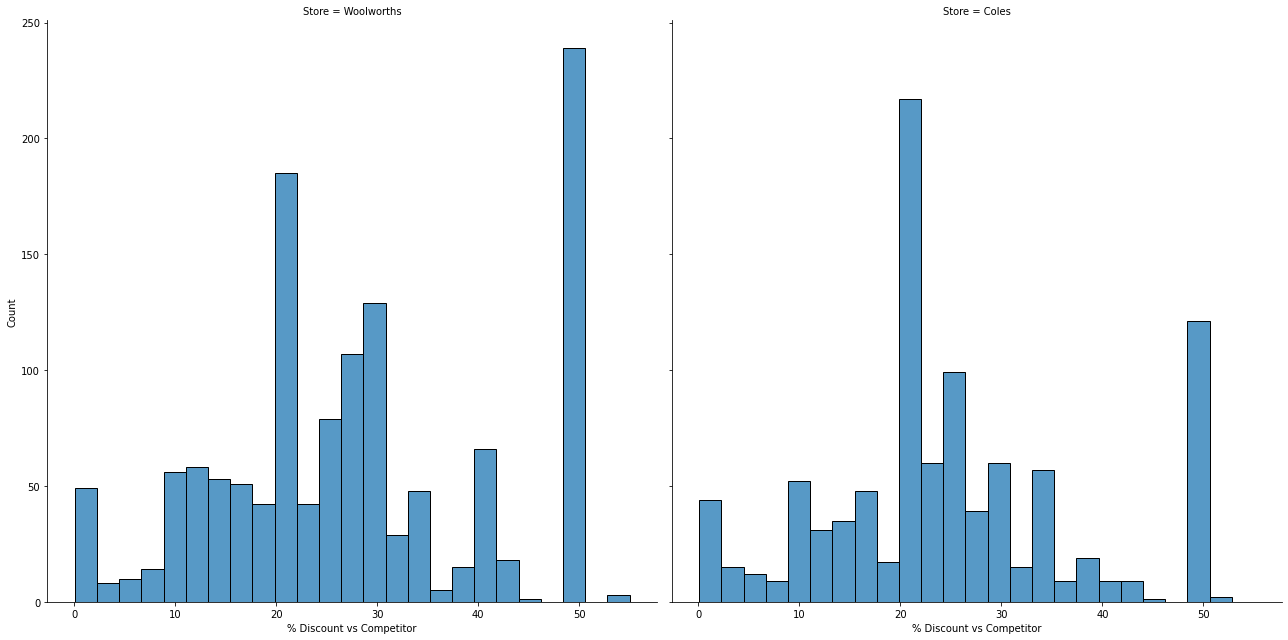

In [64]:
distribution_comparison = sns.displot(data=discount_col_wow, x='% Discount vs Competitor', col='Store', multiple='dodge', height=9)

#### Woolworths Half-price deeper look

In [65]:
print(f"\nWoolworths has:\n {len(wow_cheapest.loc[wow_cheapest['% Discount'] >= 50])} products which are 50% or more off")

print(f" {len(wow_cheapest.loc[(wow_cheapest['% Discount'] >= 50) & (wow_cheapest['WOW Specials'] == 'Specials')])} are on special\n")


Woolworths has:
 238 products which are 50% or more off
 238 are on special



#### Coles Half-price deeper look

In [66]:
print(f"\nColes has:\n {len(coles_cheapest.loc[coles_cheapest['% Discount'] >= 50])} products which are half price")

print(f" {len(coles_cheapest.loc[(coles_cheapest['% Discount'] >= 50) & (coles_cheapest['COL Specials'] == 'Specials')])} are on special\n")


Coles has:
 123 products which are half price
 122 are on special



In [67]:
coles_cheapest.loc[(coles_cheapest['% Discount'] >= 50) & (coles_cheapest['COL Specials'] != 'Specials')]

,Brand_Product_Size,COL Price,WOW Price,Cheapest Seller,COL Specials,WOW Specials,% Discount
4473,Schick Mens Razor Quattro Titanium Kit each,4.5,9.0,COL,,,50.0


The lone product above (Schick Mens Razor Quattro Titanium Kit each) that's 50% off at Coles might potentially be on special but the tag was missing or the scraper might have missed it (no idea how but definitely possible).

Product match is confirmed by visiting both URLs.

## Visualising the Differences

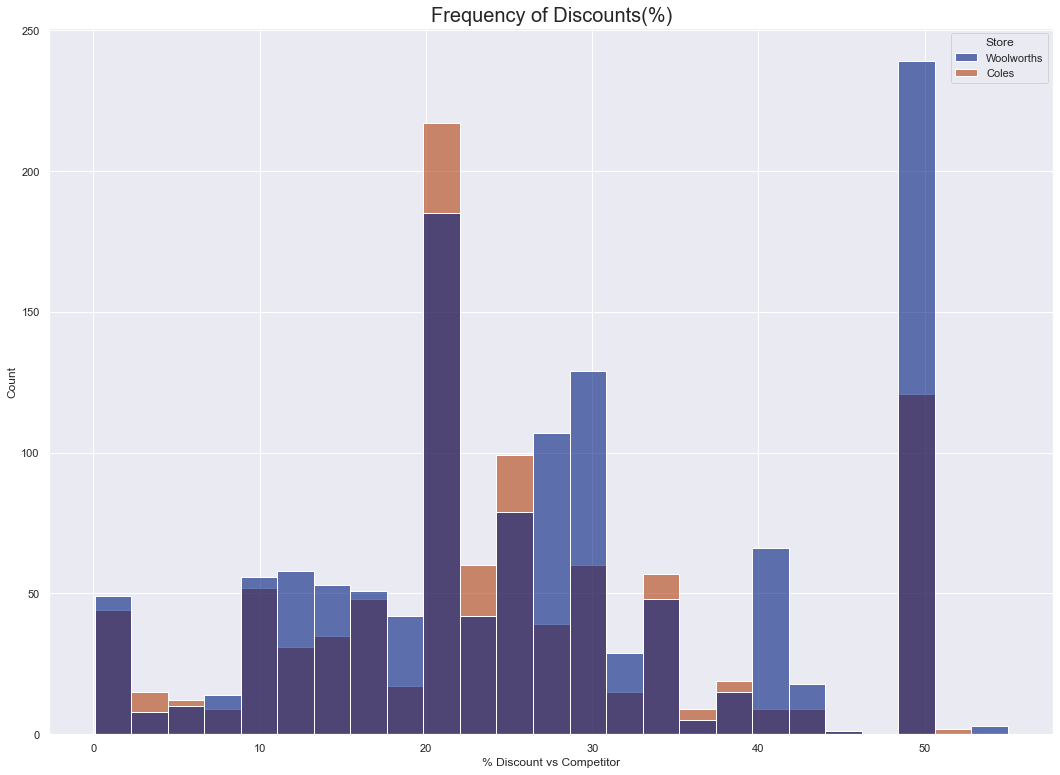

In [68]:
sns.set(rc={"figure.figsize": (18,13)})

discount_comparison = sns.histplot(
    data=discount_col_wow, 
    x='% Discount vs Competitor', 
    alpha=0.6, 
    hue='Store', 
    palette='dark'
).set_title('Frequency of Discounts(%)', fontdict={'fontsize': 20}
                                                                                                          )

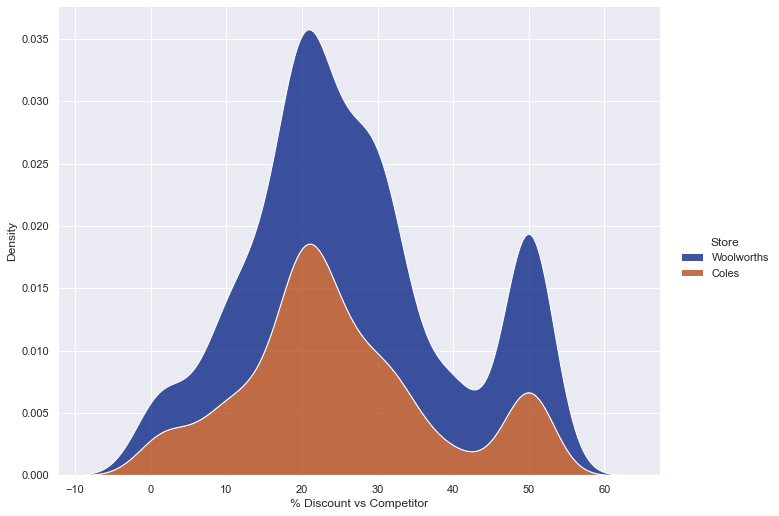

In [69]:
col_wow_kdeplot = sns.displot(discount_col_wow, x='% Discount vs Competitor', alpha=0.75, hue='Store', kind='kde', multiple='stack', height=7.33, aspect=1.3, palette='dark')

In [70]:
common_discounts = discount_col_wow['% Discount vs Competitor'].value_counts().rename_axis('Discount Amount (%)').reset_index(name='Frequency of Occurence')
common_discounts.head()

,Discount Amount (%),Frequency of Occurence
0,50.00,330
1,20.00,280
2,25.00,149
3,30.00,126
4,28.57,96


In [71]:
common_discounts['Percentage of Total'] = common_discounts['Frequency of Occurence']/common_discounts['Frequency of Occurence'].sum()*100

In [72]:
round(common_discounts.set_index('Discount Amount (%)').head(10), 2)

,Frequency of Occurence,Percentage of Total
Discount Amount (%),,
50.00,330,14.43
20.00,280,12.24
25.00,149,6.52
30.00,126,5.51
28.57,96,4.20
33.33,94,4.11
16.67,73,3.19
40.00,64,2.80
10.00,45,1.97
